# Examples of Video Poker Models

### illustrative examples of video poker modeling use cases
> Video poker is a combination of slot machines and poker, it is usually played at a slot like machine rather than at a poker table; the significant point of difference from slot machines is that video poker is a game of skill. The game consists of 5 cards being dealt to the player, the player then selects n number of cards from those dealt to create a hand. Cards not selected are then discarded. The number of cards discarded determine the amount of cards to be drawn in the next round; the score is determined by the combinations the player can form using the cards selected from the first cards dealt and the cards dealt in the second round to replace those discarded. 

> An important point in video poker is that there are levels of better (1-5) which have different 'payout' amounts, these payout tables can be specific to machines or to casinos. This model uses the 9/6 'Jacks or Better' payout table which appears to be one of the more common. The model in this case works by taking all the possible combinations of cards from the first round, these would be the cards that would be kept conceptually, and then running n simulations (default 1,000) to determine the value of each possible hand. This allows the player to determine the best hand to select. 

In [1]:
import videoPoker

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

sns.set_theme()

In [2]:
from videoPoker import findBestHand, runSimGames, playGame, simulateNumberGames, score_hand

In [3]:
payTable = {
    'royal_flush':4000,
    'straight_flush':250,
    'four_of_a_kind':125,
    'full_house':45,
    'flush':30,
    'straight':20,
    'three_of_a_kind':15,
    'two_pairs':10,
    'better_jack_pair':5
}

#### Payout table examples
For this specific payout table, no combination of cards worse than a pair of jacks will return a payout. An example of this is shown below. 

In [4]:
hand1 = ['H10','D10','C2','S6','S14'] # this is pair of 10s
score_hand(hand1,payTable)

(0, 'pair')

In [5]:
hand2 = ['H12','D12','C2','S6','S14'] # this is pair of Kings
score_hand(hand2,payTable)

(5, 'pair')

In [6]:
hand3 = ['H10','C10','S10','H11','D11'] # full house
score_hand(hand3,payTable)

(45, 'full house')

#### Validation of strategy 
There are many guides online that suggest optimal video poker strategies, these specific examples can be used to validate the outputs of this model. A good case study, (link: https://www.gamblingsites.com/online-casino/video-poker/strategy/) explains that when faced with a hand that gives you 4 cards to a royal flush (10 to Ace of all same suit) but you also have a pair. This means that you are attempting to determine whether it would be more optimal to role the dice and hope to get the last card to complete the royal flush or take the guarenteed two pair in the hand. Note, you would have to remove the card that creates the pair in order to hope to get the royal flush. 

The website suggests that the clear choice is the royal flush because mathematically while the odds of getting the pair are 100%, the payout of the royal flush is so much higher that it makes it worth your while to take a chance on the royal flush.

This scenario is modeled below. 

In [7]:
cardsDealt = ['H10','H11','H12','H13','H13']
bestHand,bestScore = findBestHand(cardsDealt,payTable)
print('Cards Dealt: {}'.format(cardsDealt))
print('Best Hand: {}, Associated Score: {} (n=1,000)'.format(bestHand,bestScore))

Cards Dealt: ['H10', 'H11', 'H12', 'H13', 'H13']
Best Hand: ['H10', 'H11', 'H12', 'H13'], Associated Score: 13335 (n=1,000)


The variable 'cardsDealt' above contains the example mentioned above, we can see that the model reaches the same conclusion as the optimal strategy in the article. The score here is the sum of the payouts related to playing the hand combination of cards 1,000 times, this calculation takes into account the cost of these bets by subtracting 5 for every bet placed. Thus, the score represents the profit of the hand after 1,000 simulated games. 

#### Longterm results of the strategy
The model below will execute the strategy over n number of simulations, in each game or simulation applying the model above to determine the optimal hand. This model always bets 5 for ease of not having to modify the pay tables. 

In [8]:
sims = simulateNumberGames(100,payTable)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:44<00:00,  1.65s/it]


In [9]:
randSims = simulateNumberGames(100,payTable,pickRandom=True)

100%|█████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 16129.46it/s]


In [19]:
df = pd.DataFrame({'wStrategy':np.cumsum(sims),'rand':np.cumsum(randSims)})

<AxesSubplot:title={'center':'comparison of 100 games of strategy and random'}, xlabel='time', ylabel='bankroll'>

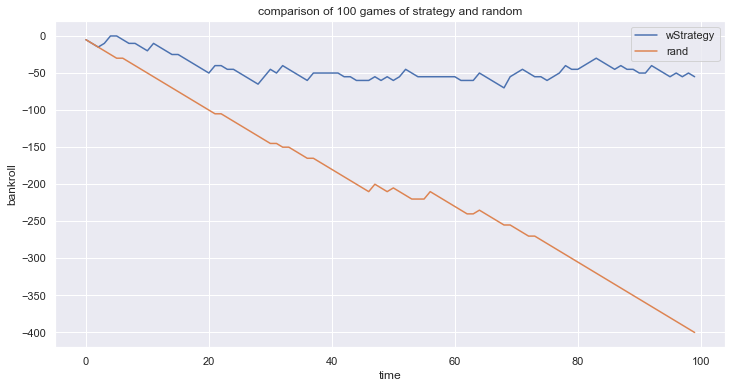

In [22]:
df.plot(kind='line',title='comparison of 100 games of strategy and random',figsize=(12,6),xlabel='time',ylabel='bankroll')

The plot above shows the application of choosing the best hand as defined by the quantitive approach outlined above every hand, the 'rand' line models randomly choosing a number of cards to hold from those dealt. The strategy clearly outperforms the random choosing. 

In [11]:
cumSum = np.cumsum(sims)
wStarting = cumSum + 1000

In [13]:
def investmentModelCash(alloc,arr):
    
    cash = 50
    shares = 50 / arr[0]
    
    cashArr = []
    sharesArr = []
    totalVal = []
    
    for p in arr:
        
        mv = shares * p
        
        currPortVal = mv + cash
        
        diffTarg = mv - alloc * currPortVal
        
        shares += -diffTarg / p
        
        cash += diffTarg
        
        totalVal.append(currPortVal)
        cashArr.append(cash)
        sharesArr.append(shares)

    # df formatting
    df = pd.DataFrame({'totalVal':totalVal,'cash':cashArr,'shares':sharesArr,'randomWalk':arr})
        
    return df

In [14]:
t = investmentModelCash(0.5,wStarting)

<AxesSubplot:title={'center':'application of shannons demon'}>

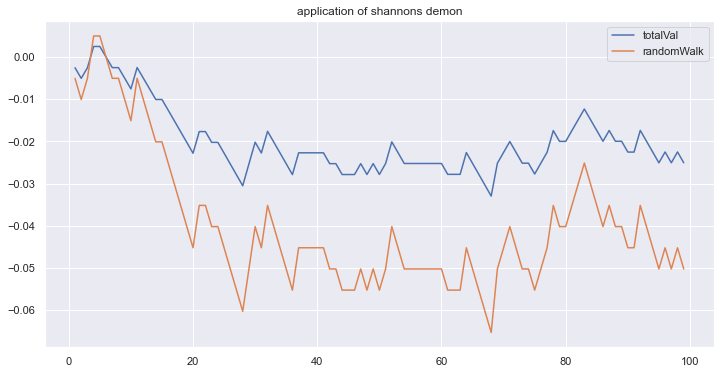

In [23]:
((t[['totalVal','randomWalk']].pct_change()+1).cumprod()-1).plot(kind='line',figsize=(12,6),title='application of shannons demon')

The application of Shannon's demon is shown above, this is a 50% cash and 50% underlying portfolio with a daily rebalance, it appears that this return stream is not volatile enough to make shannon's demon worthwhile but it does significantly limit the loses taken. 